<a href="https://colab.research.google.com/github/AneFernaandes/analise-previsao-de-compra-cliente-machine-learning/blob/main/LH_EA_ELIANE_PATRICIO_FERNANDES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entender as operações e comportamentos dos clientes do Banco BanVic

Descrição do desafio : https://docs.google.com/document/d/1kgw2CCjPpDyzo58KUhzl1Rs_j7vJMw0Kj4Kb5v5WXZQ/edit

Esta análise tem como objetivo explorar dados dos clientes e transaçoes do Banco BanVic, destacando como entender esses dados podem melhorar significamente nos serviços oferecidos.

## Essas são as perguntas que respondo nessa análise:


* Quais são as preferências de transação dos clientes em termos de modalidades PIX, TED, compra crédito, etc.?
* O turno do dia interfere na preferência de modalidade de transação?
* Como as preferências de transação variam ao longo do tempo por ano, mês, dia da semana, turno?
* Qual perfil demográfico dos clientes do banco?
* Qual tipo de agência é mais popular?
* Quais clientes são mais ativos?
*  Qual tipo de transação está em desuso?
* Qual perfil de cliente mais usa o serviço do banco?
* Quais são as contas ou clientes com maior volume de transações?
* Quais são as oportunidades de expansão geográfica ou de oferta de serviços digitais em outros estados?

Importando os pacotes que serão utilizados na análise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Carregamento dos dados

Carregando os arquivos com os dados.

In [2]:
df_agencias = pd.read_csv('/content/agencias.csv')
df_clientes = pd.read_csv('/content/clientes.csv')
df_colaborador_agencia = pd.read_csv('/content/colaborador_agencia.csv')
df_colaboradores = pd.read_csv('/content/colaboradores.csv')
df_contas = pd.read_csv('/content/contas.csv')
df_propostas = pd.read_csv('/content/propostas_credito.csv')
df_transacoes = pd.read_csv('/content/transacoes.csv')

# Tratamento e Exploração das Transações

In [3]:
df_transacoes.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0


In [4]:
#descrição estatística dos dados de transações
df_transacoes.describe()

,cod_transacao,num_conta,valor_transacao
count,71999.000000,71999.000000,71999.000000
mean,36000.000000,499.486632,357.025159
std,20784.465353,288.907850,6550.523464
min,1.000000,1.000000,-132100.000000
25%,18000.500000,249.000000,-121.870000
50%,36000.000000,499.000000,-39.810000
75%,53999.500000,749.000000,-12.860000
max,71999.000000,999.000000,480270.000000


A média de valor da transação é de 357.02.
Possue 71999 linhas com informações.

Irei analisar o comportamento dos clientes durante os dias da semana e horários e volume de transações.

## Tratamento do formato da coluna de data para análise de influência de dia da semana, bem como a relação com os horários



In [5]:
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], errors='coerce')
# Criando uma nova coluna Data para armazenar as datas formatadas
df_transacoes['Data'] = df_transacoes['data_transacao'].dt.strftime('%d/%m/%y')
# Criando uma nova coluna Hora para armazenar as horas
df_transacoes['Hora'] = df_transacoes['data_transacao'].dt.strftime('%H:%M')

df_transacoes = df_transacoes.drop('data_transacao', axis =1)

df_transacoes = df_transacoes.to_csv('df_transacoes_tratadas.csv', index = False)
df_transacoes_tratadas = pd.read_csv('df_transacoes_tratadas.csv')

df_transacoes_tratadas.head()



,cod_transacao,num_conta,nome_transacao,valor_transacao,Data,Hora
0,3100,256,Saque,-130.0,22/05/20,03:15
1,28405,256,Saque,-255.0,29/06/21,11:52
2,1776,512,Saque,-250.0,17/05/20,13:04
3,14311,512,Saque,-80.0,06/09/20,02:55
4,25012,512,Saque,-475.0,16/10/20,09:26


In [6]:
df_transacoes_tratadas.dtypes

cod_transacao        int64
num_conta            int64
nome_transacao      object
valor_transacao    float64
Data                object
Hora                object
dtype: object

In [7]:
df_transacoes_tratadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_transacao    71999 non-null  int64  
 1   num_conta        71999 non-null  int64  
 2   nome_transacao   71999 non-null  object 
 3   valor_transacao  71999 non-null  float64
 4   Data             71999 non-null  object 
 5   Hora             71999 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.3+ MB


In [8]:
#verificando se há valores ausentes
df_transacoes_tratadas.isna().sum()

cod_transacao      0
num_conta          0
nome_transacao     0
valor_transacao    0
Data               0
Hora               0
dtype: int64

# Analisando o comportamento dos clientes através das transações

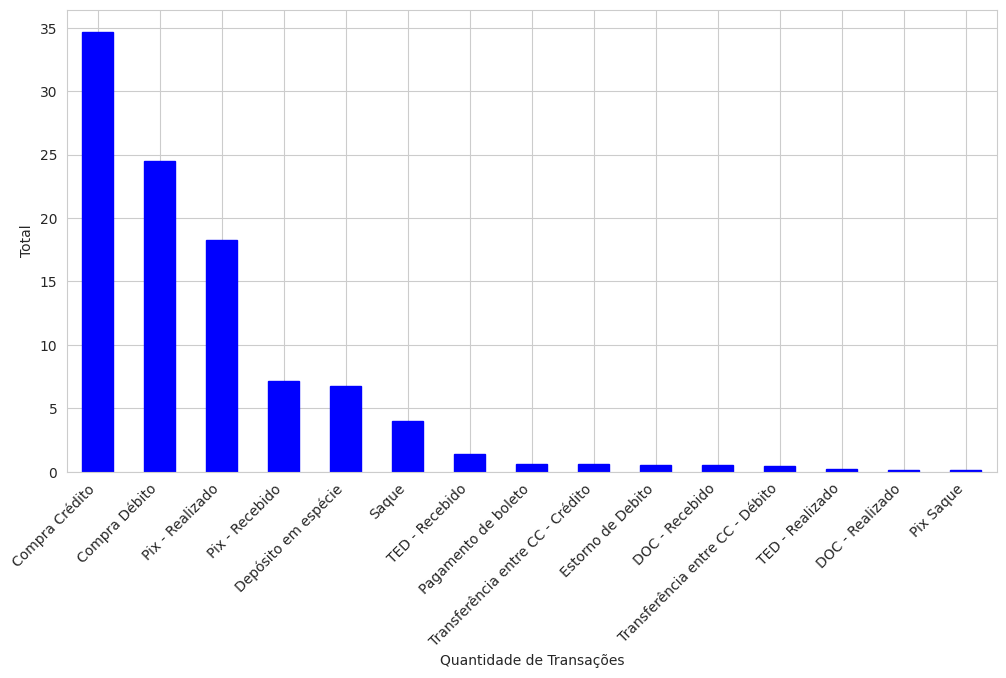

In [37]:
# verificando a quantidade de ocorrências por tipo de transação
quantidade_transacoes = df_transacoes_tratadas['nome_transacao'].value_counts()
total_transacoes = quantidade_transacoes.sum()
percentual_transacoes = (quantidade_transacoes / total_transacoes)*100
plt.figure(figsize = (12,6))
percentual_transacoes.plot(kind='bar', color='blue', edgecolor='blue')
plt.xlabel('Quantidade de Transações')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')
plt.show()



## Os dados mostram que a maior parte das transações é realizada por meio de compra crédito 34.6% , débito 24.53% e PIX - Realizado com 18.28%, enquanto o formato PIX saque, TED e DOC tem poucas transações entre 0.12% a 0.18%.

* Mostrando a preferência dos clientes por essas transações: compra crédito , débito   e PIX

* O banco pode aproveitar essa preferência dos clientes para promover ativamente essas modalidades de transação, por exemplo, oferecendo benefícios adicionais, como cashback ou descontos especiais, para transações realizadas com compra a crédito, débito e PIX. Além disso, o banco pode investir em campanhas de marketing direcionadas para destacar os benefícios e conveniências dessas modalidades de transação, incentivando ainda mais seu uso pelos clientes.

In [10]:
percentual_transacoes.head(20)

Compra Crédito                      34.690760
Compra Débito                       24.530896
Pix - Realizado                     18.283587
Pix - Recebido                       7.130655
Depósito em espécie                  6.758427
Saque                                3.998667
TED - Recebido                       1.395853
Pagamento de boleto                  0.627786
Transferência entre CC - Crédito     0.612509
Estorno de Debito                    0.559730
DOC - Recebido                       0.558341
Transferência entre CC - Débito      0.420839
TED - Realizado                      0.180558
DOC - Realizado                      0.126391
Pix Saque                            0.125002
Name: nome_transacao, dtype: float64

## Valor médio das transações

In [11]:
df_transacoes_tratadas['valor_transacao'].mean()

357.02515868275947

## Quais são as contas com maior volume de transações?

In [12]:

movimentacoes_conta = df_transacoes_tratadas.groupby('num_conta')['valor_transacao'].sum().reset_index()
# Ordenando as contas pelo total de movimentações
movimentacoes_conta = df_transacoes_tratadas.sort_values(by='valor_transacao', ascending=False)
movimentacoes_conta.head()

,cod_transacao,num_conta,nome_transacao,valor_transacao,Data,Hora
27077,24610,225,TED - Recebido,480270.0,20/11/22,13:12
27055,5387,220,TED - Recebido,453155.0,29/09/17,01:52
20810,50356,365,DOC - Recebido,333355.0,26/01/22,19:18
20892,21221,157,DOC - Recebido,262250.0,26/09/18,23:01
26696,7534,391,TED - Recebido,254560.0,25/09/20,14:40


## Verificando qual dia do mês tem mais transações

Essa análise pode ser útil para o banco em várias estratégias e medidas de negócio, tais como: planejamento de recursos operacionais para os dias com maior volume, marketing e promoções especiais.

In [13]:
df_transacoes_tratadas['Data'] = pd.to_datetime(df_transacoes_tratadas['Data'])
df_transacoes_tratadas['Ano'] = df_transacoes_tratadas['Data'].dt.year
df_transacoes_tratadas['Mês'], df_transacoes_tratadas['Dia'] = (df_transacoes_tratadas['Data'].dt.month, df_transacoes_tratadas['Data'].dt.day)
df_transacoes_tratadas['Data'] = df_transacoes_tratadas['Data'].dt.date

In [14]:
df_transacoes_tratadas.head()

,cod_transacao,num_conta,nome_transacao,valor_transacao,Data,Hora,Ano,Mês,Dia
0,3100,256,Saque,-130.0,2020-05-22,03:15,2020,5,22
1,28405,256,Saque,-255.0,2021-06-29,11:52,2021,6,29
2,1776,512,Saque,-250.0,2020-05-17,13:04,2020,5,17
3,14311,512,Saque,-80.0,2020-06-09,02:55,2020,6,9
4,25012,512,Saque,-475.0,2020-10-16,09:26,2020,10,16


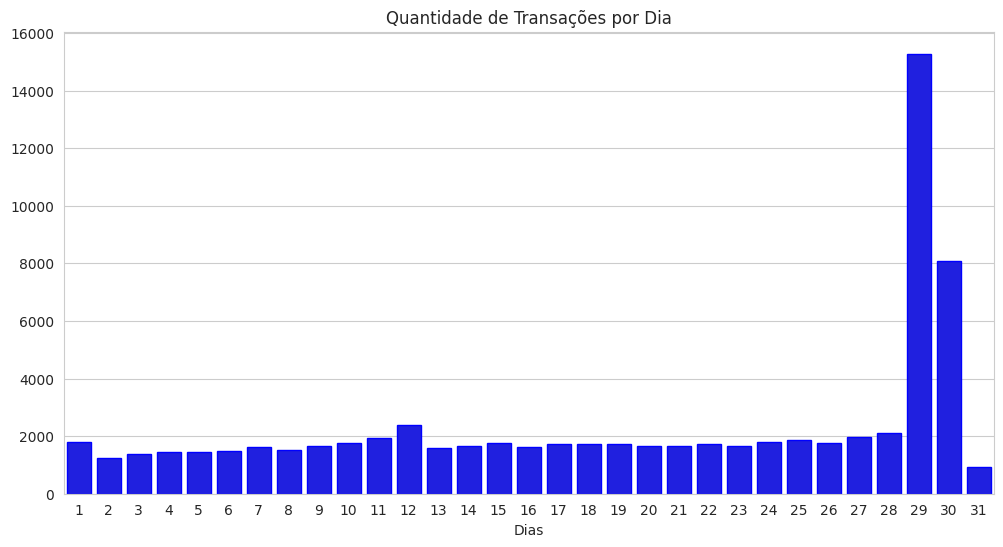

In [38]:
pl1 = plt.figure(figsize=(12,6))
month = df_transacoes_tratadas.groupby('Dia')['nome_transacao'].count().sort_values(ascending=False)
sns.barplot(x=month.index, y=month.values, color='blue', edgecolor='blue')
pl1 = plt.xlabel('Dias')
pl1 = plt.title('Quantidade de Transações por Dia');
pl1 = plt.show()

* O dia do mês que mais tem transações é 29 e 30

* O banco pode ajustar a alocação de recursos operacionais, como pessoal e sistemas, para garantir que haja capacidade suficiente para lidar com o aumento do volume de transações nos dias 29 e 30 de cada mês.

* Marketing e Promoções Especiais: Planejar campanhas de marketing e promoções especiais nesses dias para incentivar ainda mais o uso dos serviços bancários pelos clientes.

 Com base nesses insights, o banco pode desenvolver produtos e serviços específicos que atendam às necessidades dos clientes durante esses períodos de pico de atividade, como ofertas de crédito ou investimentos temporários.


In [16]:
# fazendo tratamento para verificar o comportamento por turno
df_transacoes_tratadas['Hora'] = pd.to_datetime(df_transacoes_tratadas['Hora'])
def get_turno(horario):
    if 6 <= horario.hour < 12:
        return 'Manhã'
    elif 12 <= horario.hour < 18:
        return 'Tarde'
    elif 18 <= horario.hour < 24:
        return 'Noite'
    else:
        return 'Madrugada'

df_transacoes_tratadas['Turno'] = df_transacoes_tratadas['Hora'].apply(get_turno)

In [17]:
df_transacoes_tratadas.head()

,cod_transacao,num_conta,nome_transacao,valor_transacao,Data,Hora,Ano,Mês,Dia,Turno
0,3100,256,Saque,-130.0,2020-05-22,2024-02-26 03:15:00,2020,5,22,Madrugada
1,28405,256,Saque,-255.0,2021-06-29,2024-02-26 11:52:00,2021,6,29,Manhã
2,1776,512,Saque,-250.0,2020-05-17,2024-02-26 13:04:00,2020,5,17,Tarde
3,14311,512,Saque,-80.0,2020-06-09,2024-02-26 02:55:00,2020,6,9,Madrugada
4,25012,512,Saque,-475.0,2020-10-16,2024-02-26 09:26:00,2020,10,16,Manhã


## Quais são os turnos de pico de atividade bancária e quais modalidades de transação são mais populares nesses horários?

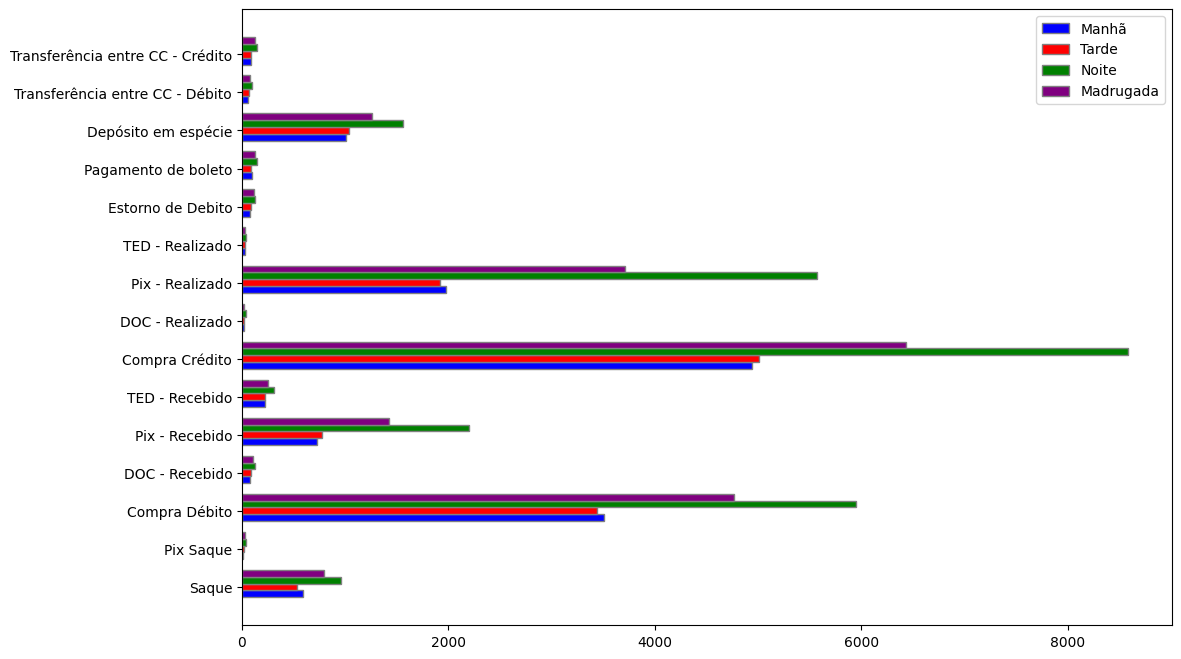

In [18]:
transacoes = df_transacoes_tratadas['nome_transacao'].unique()
turnos = ['Manhã', 'Tarde', 'Noite', 'Madrugada']
barWidth = 0.18
# Criando uma lista para cada turno com a quantidade de transações por tipo
barras1 = df_transacoes_tratadas[df_transacoes_tratadas['Turno'] == 'Manhã']['nome_transacao'].value_counts().reindex(transacoes).tolist()
barras2 = df_transacoes_tratadas[df_transacoes_tratadas['Turno'] == 'Tarde']['nome_transacao'].value_counts().reindex(transacoes).tolist()
barras3 = df_transacoes_tratadas[df_transacoes_tratadas['Turno'] == 'Noite']['nome_transacao'].value_counts().reindex(transacoes).tolist()
barras4 = df_transacoes_tratadas[df_transacoes_tratadas['Turno'] == 'Madrugada']['nome_transacao'].value_counts().reindex(transacoes).tolist()

# posição das barras
r1 = np.arange(len(barras1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.figure(figsize=(12, 8))
plt.barh(r1, barras1, color='b', height=barWidth, edgecolor='grey', label='Manhã')
plt.barh(r2, barras2, color='r', height=barWidth, edgecolor='grey', label='Tarde')
plt.barh(r3, barras3, color='g', height=barWidth, edgecolor='grey', label='Noite')
plt.barh(r4, barras4, color='purple', height=barWidth, edgecolor='grey', label='Madrugada')

plt.yticks([r + barWidth for r in range(len(barras1))], transacoes)
plt.legend()
plt.show()



* A partir dos dados verifiquei que a modalidade TED, DOC, PIx saque estão com pouco uso, independente do turno.

O banco pode revisar sua oferta de serviços e promover essas modalidades de transação de maneira mais eficaz. Isso pode incluir campanhas de marketing direcionadas, incentivos especiais ou simplificação do processo de realização dessas transações para aumentar sua utilização.

* Os clientes estão optando mais em usar Compra crédito, prinipalmente a noite e garantir que haja pessoal adequado para atendimento.

Desenvolver atividades noturnas, como promoções relâmpagos,

* A noite a demanda por transaçoes de credito, debito e pix aumentam.

Incluir parcerias com lojistas online ou ferrementas de análise de crédito em tempo real para facilitar as transações.

* Na madrugada, a transação mais utilizada é compra crédito


## Como as preferências de transação variam ao longo do tempo?

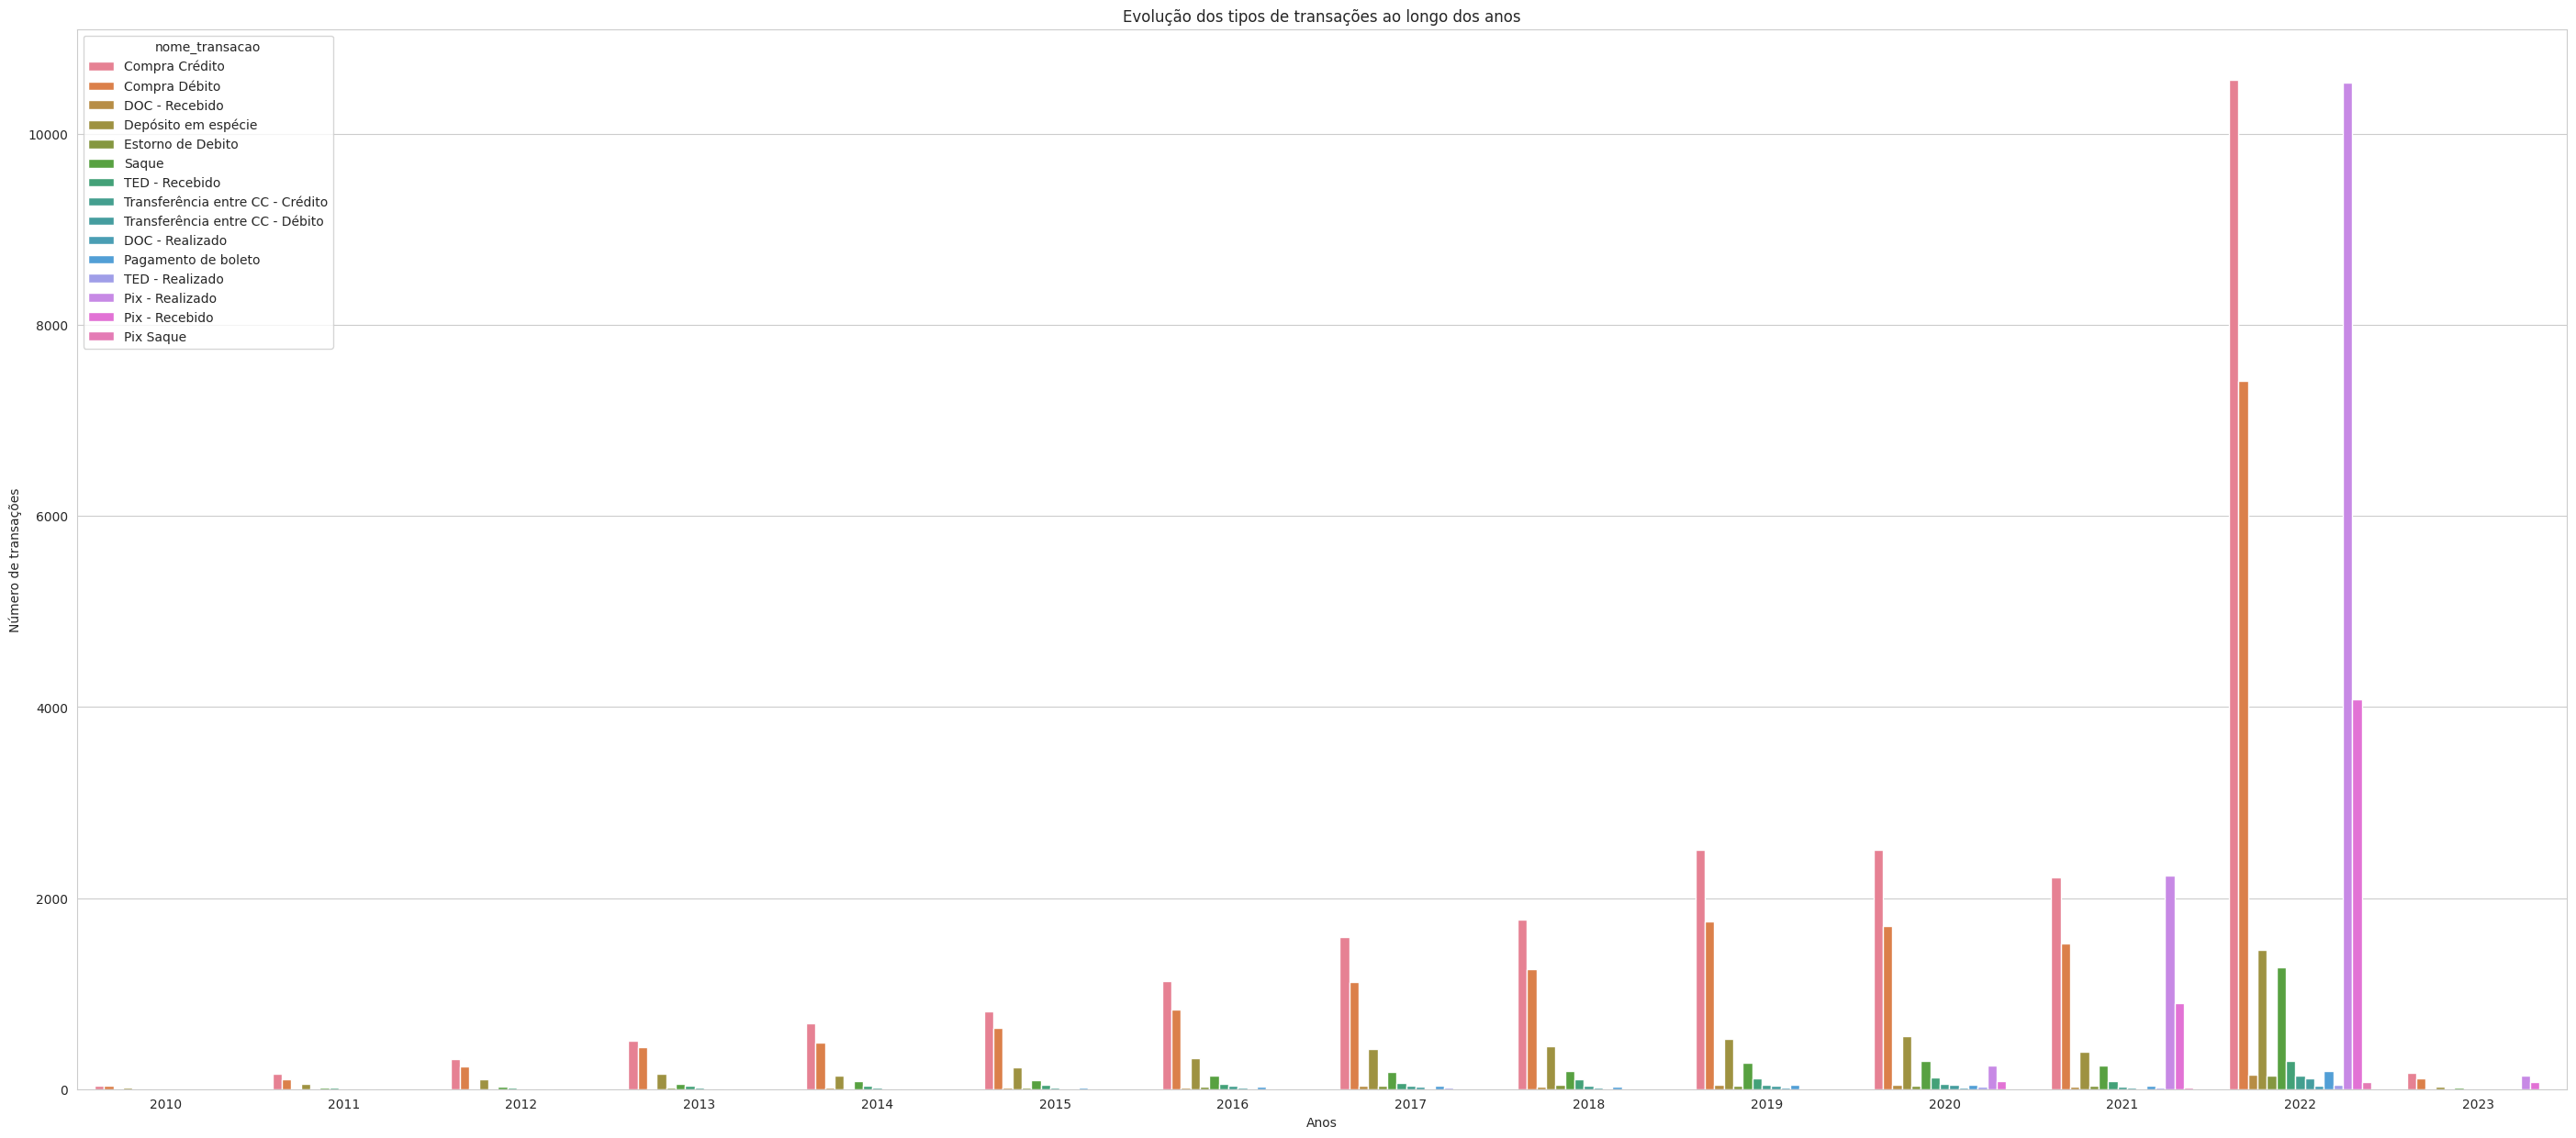

In [19]:
plt.figure(figsize=(35,15))
sns.set_style('whitegrid')

# Contando o número de transações para cada tipo e ano
transacoes_por_ano = df_transacoes_tratadas.groupby(['nome_transacao', 'Ano']).size().reset_index(name='contagem')
sns.barplot(data=transacoes_por_ano, x='Ano', y='contagem', hue='nome_transacao')

plt.title('Evolução dos tipos de transações ao longo dos anos')
plt.xlabel('Anos')
plt.ylabel('Número de transações')
plt.show()


* Ao longo dos anos tem aumentado a quantidade de transações pix e credito.
* Ano de 2023 tem poucas transações no BD.

Há uma aceitação crescente desses métodos pelos clientes. A queda nas transações em 2023 pode exigir uma investigação mais aprofundada para identificar possíveis razões, como problemas técnicos ou mudanças nas preferências dos clientes.

In [20]:
# Quantidade de transações  por ano e tipo
transacoes_por_ano = df_transacoes_tratadas[['Ano', 'nome_transacao']].groupby(['Ano', 'nome_transacao']).size().reset_index(name='Total')
transacoes_por_ano


,Ano,nome_transacao,Total
0,2010,Compra Crédito,35
1,2010,Compra Débito,33
2,2010,DOC - Recebido,1
3,2010,Depósito em espécie,16
4,2010,Estorno de Debito,1
...,...,...,...
169,2023,Pix Saque,1
170,2023,Saque,14
171,2023,TED - Realizado,2
172,2023,TED - Recebido,6


Total de transações por ano

In [21]:
total_ano = df_transacoes_tratadas.groupby(df_transacoes_tratadas['Ano']).size().sort_values(ascending=False)
total_ano

Ano
2022    36506
2021     7777
2020     5783
2019     5428
2018     3945
2017     3554
2016     2604
2015     1897
2014     1503
2013     1249
2012      734
2023      559
2011      367
2010       93
dtype: int64

# Análise do perfil dos clientes

In [22]:
df_clientes.head()

,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838


In [23]:
total_clientes = df_clientes.groupby(df_clientes['tipo_cliente']).size().sort_values(ascending=False)
total_clientes

tipo_cliente
PF    998
dtype: int64

* Todos os clientes do Banco são pessoas físicas
* Não há clientes PJ

- Os dados sugerem que banco pode ter uma estratégia específica de segmentação de mercado. Isso pode incluir produtos financeiros e serviços voltados  para o público de pessoas físicas.

- Além de trabalhar em captar clientes pessoas juridicas.

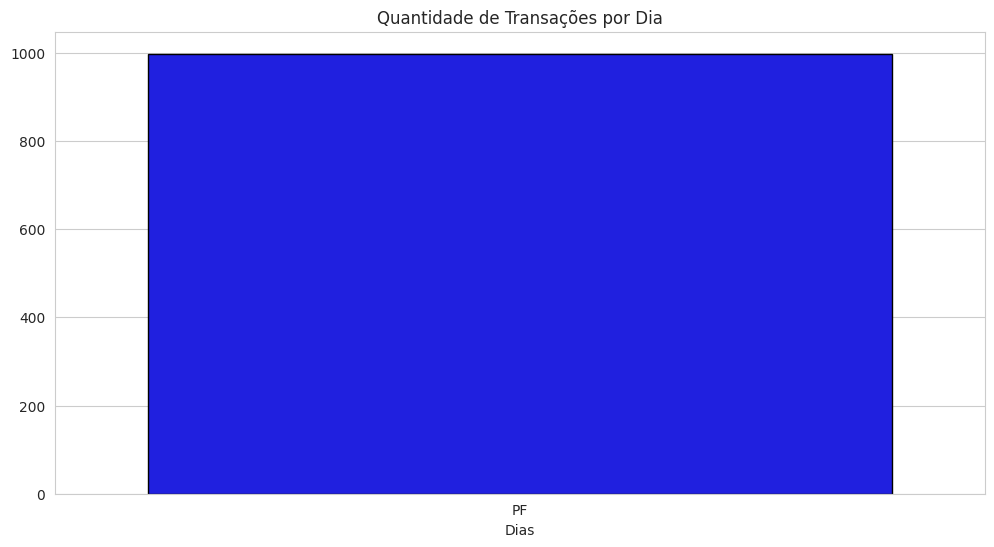

In [24]:
pl1 = plt.figure(figsize=(12,6))
month = df_clientes.groupby('tipo_cliente')['cod_cliente'].count().sort_values(ascending=False)
sns.barplot(x=month.index, y=month.values, color='blue', edgecolor='black')
pl1 = plt.xlabel('Dias')
pl1 = plt.title('Quantidade de Transações por Dia');
pl1 = plt.show()

## Analisando perfil clientes - Idade

## Quais a idade dos clientes do banco?

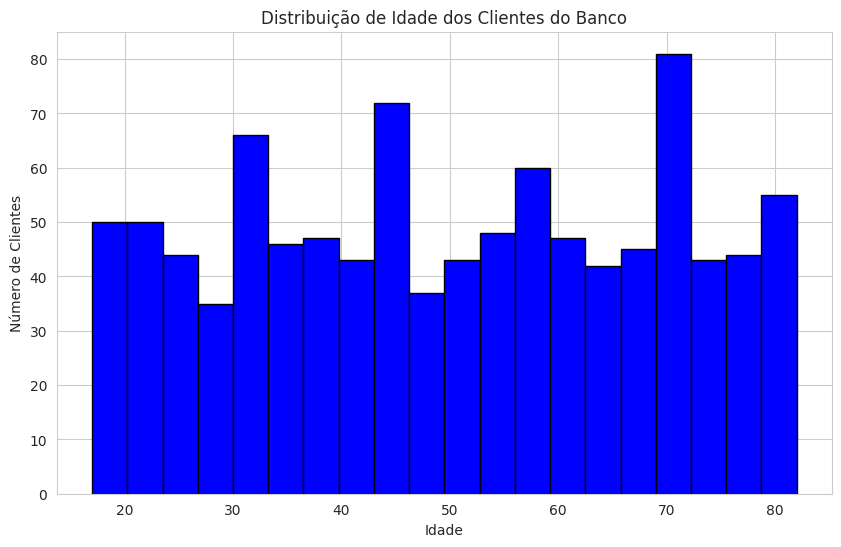

In [25]:

df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'])

# Calculando a idade de cada cliente
df_clientes['idade'] = pd.Timestamp.now().year - df_clientes['data_nascimento'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(df_clientes['idade'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição de Idade dos Clientes do Banco')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()

* Faixa etária predominante dos clientes entre 45 e 70 anos:

O banco pode adaptar seus produtos e serviços para atender às necessidades e preferências específicas desse grupo demográfico. Por exemplo, pode oferecer produtos de investimento voltados para a aposentadoria, seguros de saúde com coberturas mais abrangentes e serviços bancários digitais com interfaces simples e intuitivas para clientes mais velhos. Além disso, o banco pode desenvolver programas de educação financeira destinados a essa faixa etária para ajudá-los a planejar e gerenciar melhor suas finanças ao longo da vida.

# Popularidade das agências

In [26]:
df_contas_agencias = pd.merge(df_agencias, df_contas, on='cod_agencia')
df_contas_agencias.head()

,cod_agencia,nome,endereco,cidade,uf,data_abertura_x,tipo_agencia,num_conta,cod_cliente,cod_colaborador,tipo_conta,data_abertura_y,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital,15,15,20,PF,2022-09-11 15:51:00 UTC,2647.5973,3218.29,2022-12-30 00:00:00.679061 UTC
1,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital,16,16,20,PF,2018-04-20 12:01:00 UTC,2065.3824,2132.85,2022-12-29 23:35:48 UTC
2,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital,17,17,20,PF,2020-03-12 12:51:00 UTC,326.4070,237.60,2022-12-29 23:59:59.64537 UTC
3,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital,22,22,20,PF,2020-11-14 11:11:00 UTC,161.3195,103.16,2022-12-30 00:00:00.984558 UTC
4,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital,31,31,20,PF,2016-09-25 14:39:00 UTC,21553.2450,20280.68,2022-05-07 22:35:02 UTC


In [27]:
df_contas_agencias.isnull().sum()


cod_agencia               0
nome                      0
endereco                  0
cidade                    0
uf                        0
data_abertura_x           0
tipo_agencia              0
num_conta                 0
cod_cliente               0
cod_colaborador           0
tipo_conta                0
data_abertura_y           0
saldo_total               0
saldo_disponivel          0
data_ultimo_lancamento    0
dtype: int64

In [28]:
transacoes_agencia = df_contas_agencias['tipo_agencia'].value_counts().sort_values(ascending=False)
transacoes_agencia

Física     539
Digital    460
Name: tipo_agencia, dtype: int64

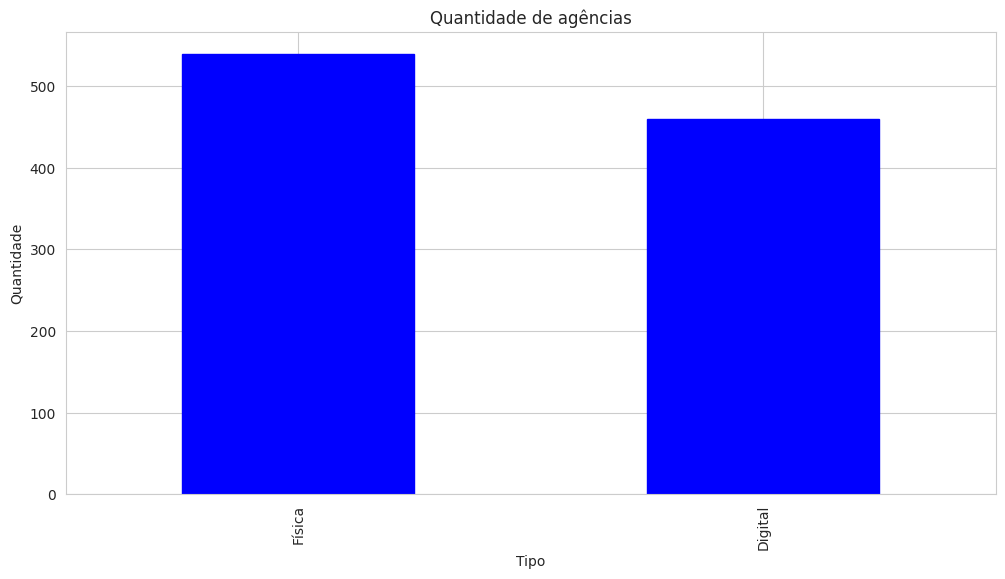

In [29]:
# Quantidade das agencias
df_contas_agencias['tipo_agencia'].value_counts().head(10).plot(kind='bar', figsize=(12, 6),color='blue', edgecolor='blue')
plt.title('Quantidade de agências')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.show()


Com base nessa distribuição, o banco pode ajustar sua estratégia de expansão e investimento.

## Quais são as oportunidades de expansão geográfica ou de oferta de serviços digitais em outros estados?

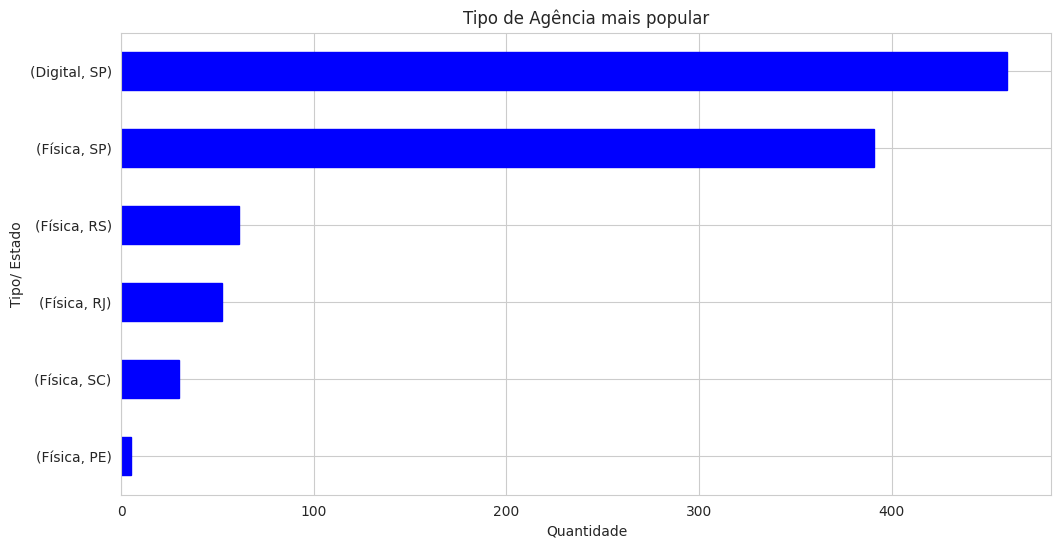

In [30]:
#Grafico mostrando a poupularidade por tipo de agencia e Estado
transacoes_por_tipo = df_contas_agencias.groupby(['tipo_agencia', 'uf']).size()
plt.figure(figsize=(12, 6))
transacoes_por_tipo.sort_values().plot(kind='barh', color='blue', edgecolor='blue')
plt.title('Tipo de Agência mais popular')
plt.xlabel('Quantidade')
plt.ylabel('Tipo/ Estado')
plt.show()

* Observamos que o banco possui 460 agências digitais, todas localizadas no estado de São Paulo.

o banco pode considerar expandir suas agências digitais para outros estados, aproveitando oportunidades de crescimento em diferentes regiões do país.

* Não há agências digitais em outros estados. Apenas Fisica.

A ausência de agências digitais em outros estados indica uma oportunidade de expansão para o banco. Considerando a crescente tendência de digitalização dos serviços bancários em todo o país, o banco pode explorar a possibilidade de abrir agências digitais em outras regiões, visando atender às necessidades dos clientes por conveniência e acessibilidade aos serviços bancários online.

In [31]:
# Quantidade de agencias  estado/tipo
agencias_estado = df_contas_agencias[['uf', 'tipo_agencia']].groupby(['uf', 'tipo_agencia']).size().reset_index(name='Total')
agencias_estado

,uf,tipo_agencia,Total
0,PE,Física,5
1,RJ,Física,52
2,RS,Física,61
3,SC,Física,30
4,SP,Digital,460
5,SP,Física,391



* Ausência de agências digitas em outros estados

Indica uma oportunidade de expansão para o banco.
A empresa pode considerar a expansão de suas agências digitais para outras regiões.

In [32]:
uf_agencia = df_contas_agencias['uf'].value_counts().sort_values(ascending=False)
uf_agencia

SP    851
RS     61
RJ     52
SC     30
PE      5
Name: uf, dtype: int64

## Transações por colaboradores

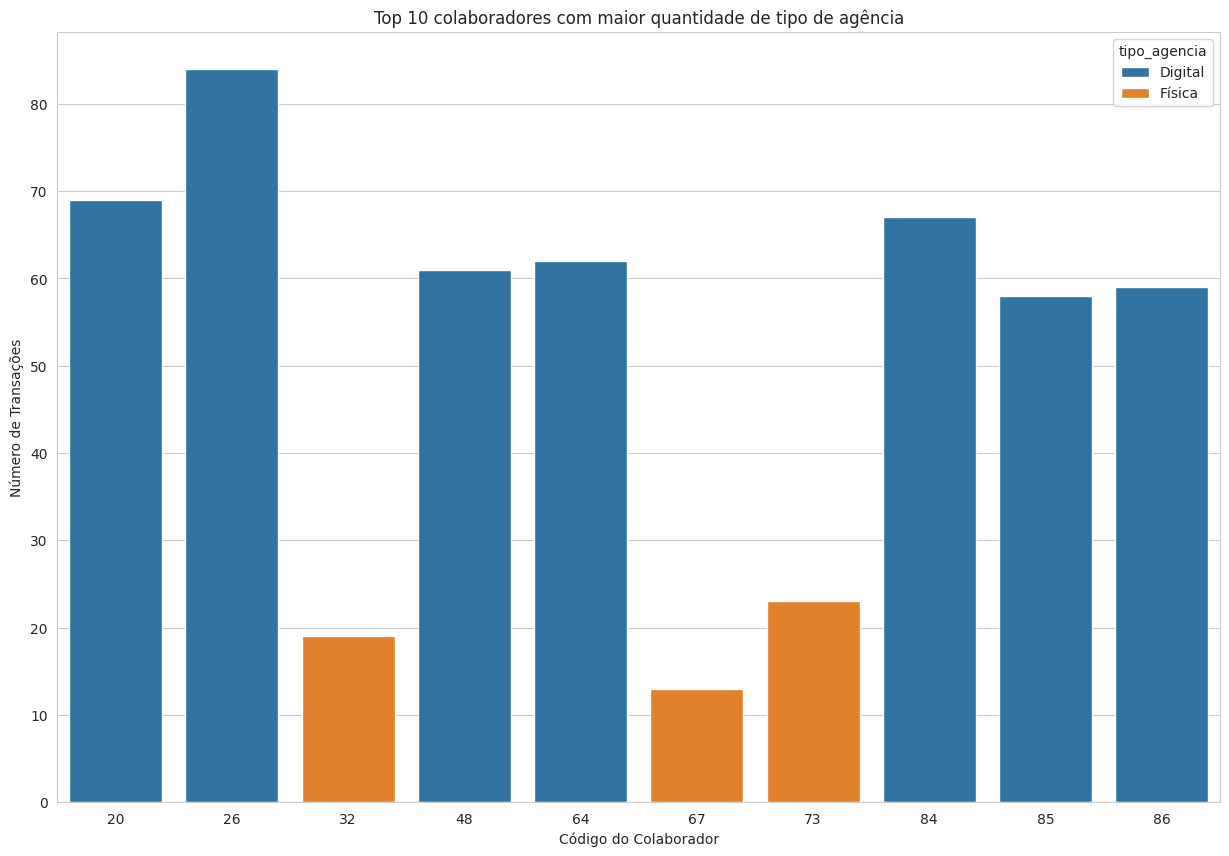

In [33]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

transacoes_por_colaboradores = df_contas_agencias.groupby(['cod_colaborador', 'tipo_agencia']).size().reset_index(name='contagem')
total_transacoes_por_colaborador = transacoes_por_colaboradores.groupby('cod_colaborador')['contagem'].sum().reset_index(name='total_transacoes')

# selecionando os top 10 colaboradores
top10_colaboradores = total_transacoes_por_colaborador.sort_values('total_transacoes', ascending=False).head(10)
transacoes_top10 = transacoes_por_colaboradores[transacoes_por_colaboradores['cod_colaborador'].isin(top10_colaboradores['cod_colaborador'])]

sns.barplot(data=transacoes_top10, x='cod_colaborador', y='contagem', hue='tipo_agencia', estimator=sum)

plt.title('Top 10 colaboradores com maior quantidade de tipo de agência')
plt.xlabel('Código do Colaborador')
plt.ylabel('Número de Transações')
plt.show()


In [34]:
colaboradores_agencia = df_contas_agencias['cod_colaborador'].value_counts().sort_values(ascending=False)
colaboradores_agencia.head(20)

26    84
20    69
84    67
64    62
48    61
86    59
85    58
73    23
32    19
67    13
96    12
61    12
15    11
83    11
3     11
30    10
98    10
56    10
57    10
69     9
Name: cod_colaborador, dtype: int64

# Conclusão

* Maior quantidade de contas/agencias digitais no Estado de são Paulo.

O BAnVic possui 460 agências digitais, todas localizadas no estado de São Paulo. Essa concentração sugere uma estratégia de expansão digital focada nessa região, aproveitando a densidade populacional e a demanda por serviços bancários online. Além de expandir suas agências digitais para outros estados, aproveitando oportunidades de crescimento em diferentes regiões do país


* Não há agências digitais em outros estados. Apenas Fisica.

A ausência de agências digitais em outros estados indica uma oportunidade de expansão para o banco. Considerando a tendência crescente de adoção de serviços digitais em todo o país, o banco pode considerar a expansão de suas agências digitais para outras regiões.

* Dia do mês e turno com maior volume de transações:

A identificação dos dias do mês com maior volume de transações e o turno com maior atividade fornecem insights valiosos para o planejamento operacional do banco. Isso pode incluir o dimensionamento adequado da equipe, garantindo que haja recursos suficientes para lidar com o aumento da demanda durante esses períodos de pico.

* Baixa utilização de certas modalidades de transação:

Baixa utilização de modalidades como transferências, pagamento de boletos, TED e PIX saque sugere uma oportunidade para o banco revisar sua oferta de serviços e promover essas modalidades de transação de maneira mais eficaz para os clientes.

* Valor médio das transações é de 357,02 e a conta 225 é a com maiores movimentações

* Análise da distribuição percentual das modalidades de transação:

A análise da distribuição percentual das modalidades de transação destaca as preferências dos clientes por compras a crédito, débito e PIX. Isso pode orientar a alocação de recursos e investimentos em serviços e tecnologias que suportem essas modalidades de transação mais populares.


* Modalidade de compra a crédito como a mais utilizada durante a madrugada:

Estratégias e medidas de negócio: O banco pode explorar oportunidades para expandir sua oferta de serviços de compra a crédito durante a madrugada, aproveitando o comportamento dos clientes nesse período. Isso pode incluir a introdução de ofertas exclusivas para compras noturnas, parcerias com varejistas online ou o desenvolvimento de ferramentas de análise de crédito em tempo real para facilitar transações seguras durante a madrugada.




* Clientes do banco são exclusivamente pessoas físicas, sem clientes PJ:

O banco deve criar uma estratégia específica de segmentação de mercado. Isso pode incluir produtos financeiros e serviços voltados especificamente para o público de pessoas físicas.

* Aumento da quantidade de transações PIX e crédito ao longo dos anos

O aumento no uso de transações PIX e crédito ao longo dos anos indica uma aceitação crescente desses métodos pelos clientes.

* Preferência dos clientes por determinadas modalidades de transação em diferentes horários e turnos:

A análise dos padrões de transações revela preferências claras dos clientes por certas modalidades em diferentes horários e turnos. Por exemplo, a preferência por compras a crédito durante a noite sugere um comportamento de consumo específico nesse período, o que pode ser útil para personalizar ofertas e promoções. Além disso, pode-se considerar a implementação de serviços adicionais ou melhorias na plataforma digital para facilitar essas transações.

